# Image Classification using Neural Networks and the MNIST Dataset

## Module Imports

In [20]:
# TensorFlow
import tensorflow as tf

# Numpy
import numpy as np

# MatPlotLib
import matplotlib .pyplot as plt

## Unpacking Data

In [6]:
# Importing dataset from Keras
mnist = tf.keras.datasets.mnist # 28x28 images of hand-drawn digits

# Unpacking dataset into training & testing splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


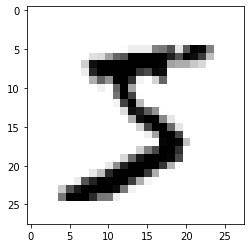

In [9]:
# Displaying the first image in the dataset
plt.imshow(x_train[0], cmap=plt.cm.binary) # using black & white colour map
plt.show()

## Normalising Data

In [12]:
# Scaling pixel values from [0 - 255] to [0.0 - 1.0]
x_train = tf.keras.utils.normalize(x_train, axis=1) # scaling training set
x_train = tf.keras.utils.normalize(x_train, axis=1) # scaling testing set

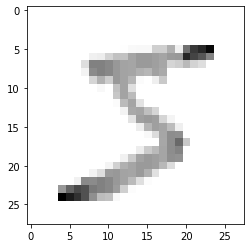

In [14]:
# Displaying the first image in the dataset (normalised)
plt.imshow(x_train[0], cmap=plt.cm.binary) # using black & white colour map
plt.show()

## Building Neural Network

In [16]:
# Using feed-forward sequential Neural Network model
model = tf.keras.models.Sequential()

# Adding NN layers
model.add(tf.keras.layers.Flatten()) # input layer (28x28 image pixels)

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # hidden layer 1
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # hidden layer 2

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer (0 - 9 digits)

# Compiling model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

2022-04-02 00:12:45.070099: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training Neural Network

In [17]:
# Training model
model.fit(x_train, y_train, epochs=3)

2022-04-02 00:15:11.215959: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2634 - accuracy: 0.9232
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1069 - accuracy: 0.9666
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0731 - accuracy: 0.9772


## Testing Neural Network

In [18]:
# Testing & evaluating model
val_loss, val_acc = model.evaluate(x_test, y_test)

# Printing evaluations
print("Loss:", val_loss, "Accuracy:", val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 45.7642 - accuracy: 0.9636
Loss: 45.764217376708984 Accuracy: 0.9635999798774719


## Saving Model

In [19]:
model.save('number_reader_nn')

2022-04-02 00:21:25.491371: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: number_reader_nn/assets


## Predicting Digits

In [24]:
# Predicting number of a drawn image
predictions = model.predict(x_test)

print("Prediction:", np.argmax(predictions[0]))

Prediction: 7


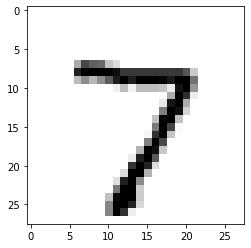

In [25]:
# Displaying the first prediction image
plt.imshow(x_test[0], cmap=plt.cm.binary) # using black & white colour map
plt.show()